<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. 

Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h1 style="color: #FF8C00;">Libraries</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7208\148195082.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  price_data.fillna(method='ffill', inplace=True)


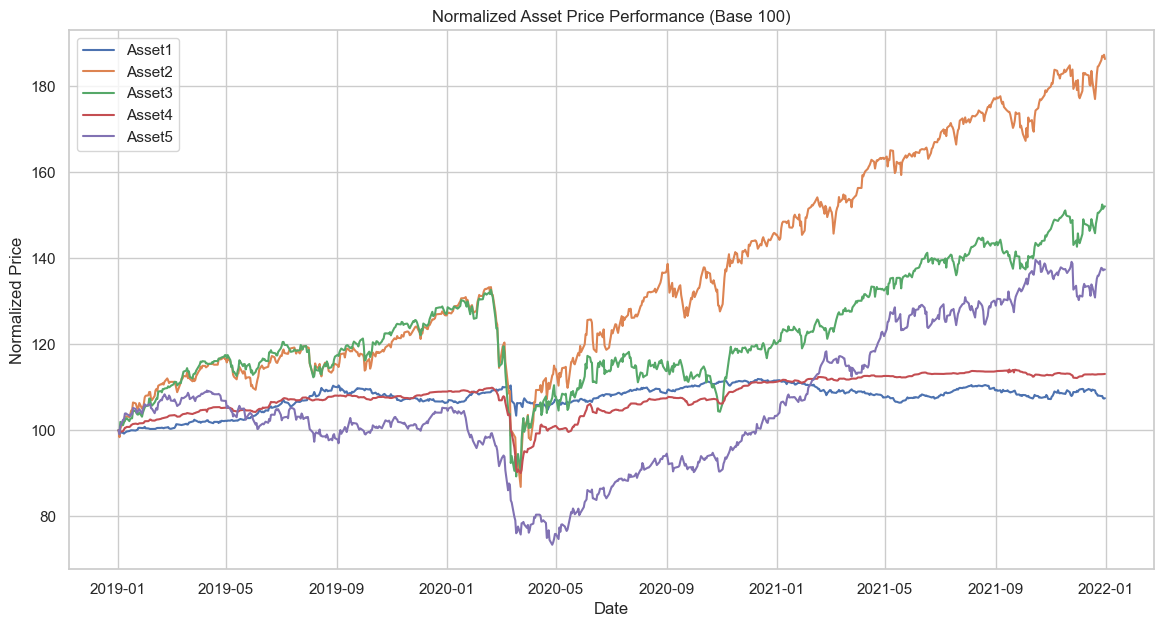

In [18]:
# style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)

# dataset
price_data = pd.read_csv('asset_price_data.csv')

# convert 'date' to datetime and set as index
price_data['date'] = pd.to_datetime(price_data['date'])
price_data.set_index('date', inplace=True)

# handle missing values (Forward fill to propagate last valid price)
price_data.fillna(method='ffill', inplace=True)

# normalize data: all series start at 100
normalized_data = (price_data / price_data.iloc[0]) * 100

plt.figure(figsize=(14, 7))
for column in normalized_data.columns:
    plt.plot(normalized_data.index, normalized_data[column], label=column)

plt.title('Normalized Asset Price Performance (Base 100)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend(loc='upper left')
plt.show()

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>

In [16]:
daily_returns = price_data.pct_change().dropna()

print("Daily Returns Head:")
print(daily_returns.head())

Daily Returns Head:
              Asset1    Asset2    Asset3    Asset4    Asset5
date                                                        
2019-01-03 -0.002032 -0.016072 -0.005699 -0.002707 -0.009432
2019-01-04 -0.002740  0.020954  0.025255 -0.001125  0.019242
2019-01-07 -0.001512  0.012632 -0.007338  0.001856  0.014792
2019-01-08 -0.001535  0.001003  0.007040  0.003605 -0.000192
2019-01-09  0.001976  0.012919  0.002272  0.004120  0.014003


<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>

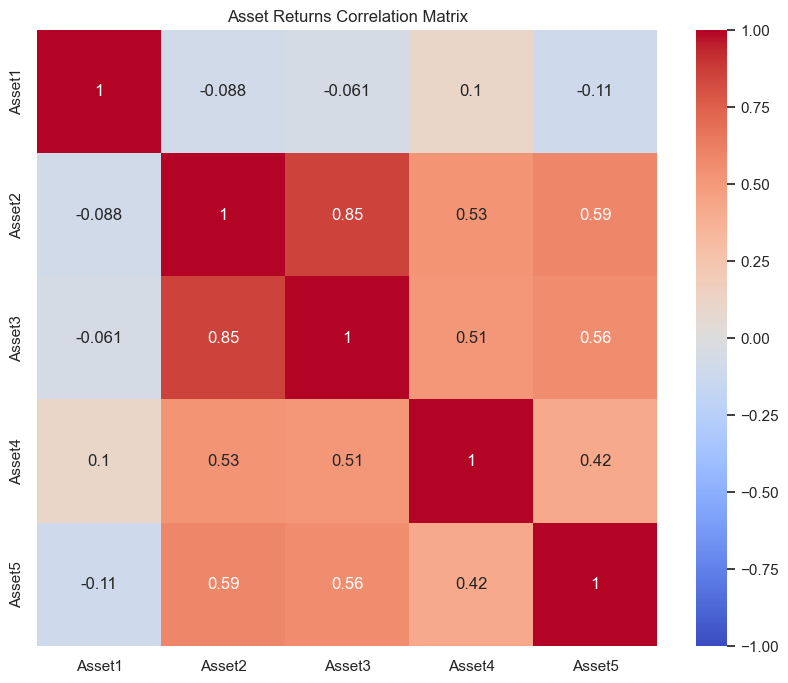

In [17]:
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Asset Returns Correlation Matrix')
plt.show()

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>

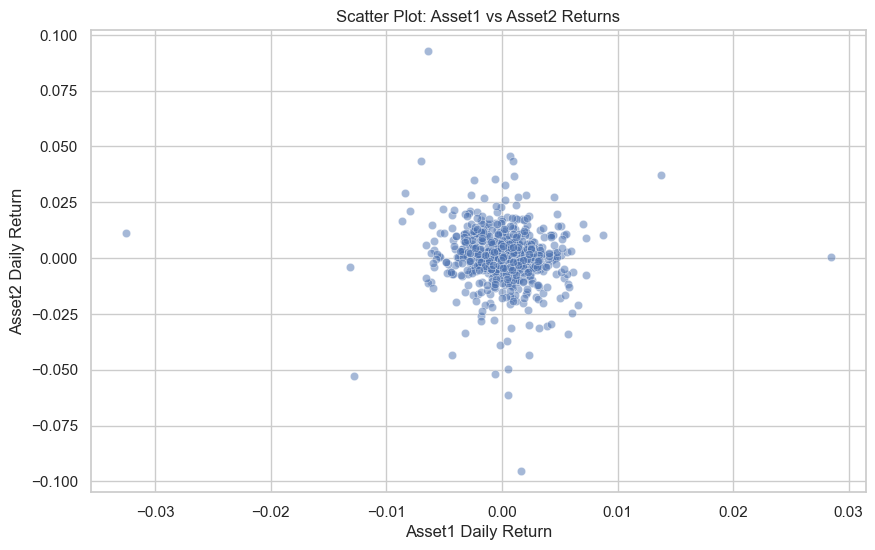

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=daily_returns['Asset1'], y=daily_returns['Asset2'], alpha=0.5)
plt.title('Scatter Plot: Asset1 vs Asset2 Returns')
plt.xlabel('Asset1 Daily Return')
plt.ylabel('Asset2 Daily Return')
plt.show()

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>

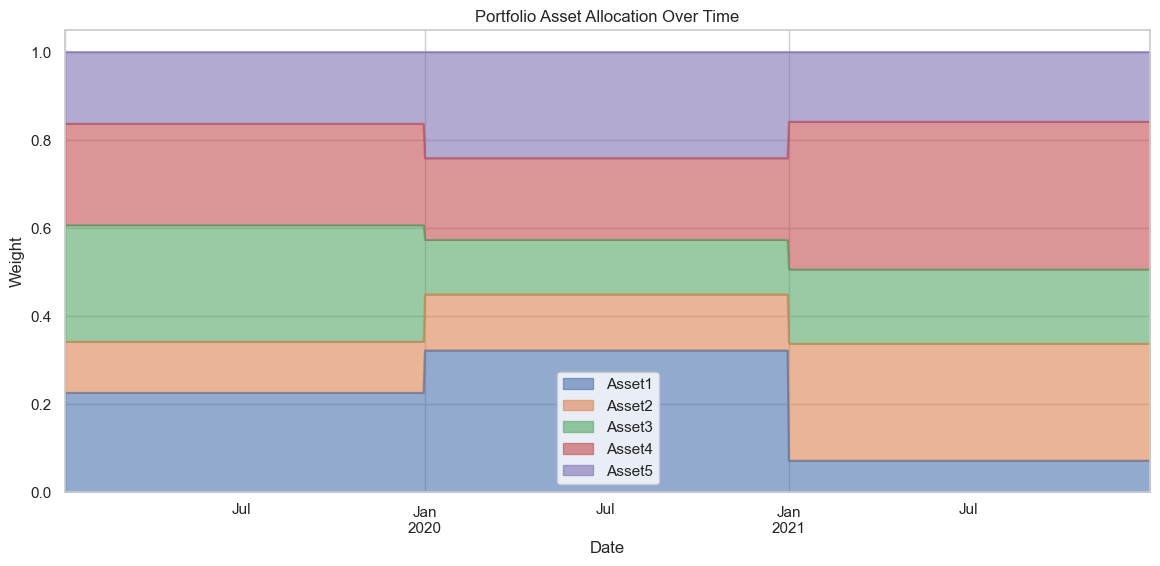

In [8]:
weights = pd.read_csv('portfolio_weights.csv')
weights['date'] = pd.to_datetime(weights['date'])
weights.set_index('date', inplace=True)

common_dates = daily_returns.index.intersection(weights.index)
aligned_returns = daily_returns.loc[common_dates]
aligned_weights = weights.loc[common_dates]

aligned_weights.plot.area(figsize=(14, 6), alpha=0.6)
plt.title('Portfolio Asset Allocation Over Time')
plt.ylabel('Weight')
plt.xlabel('Date')
plt.margins(x=0)
plt.show()

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>

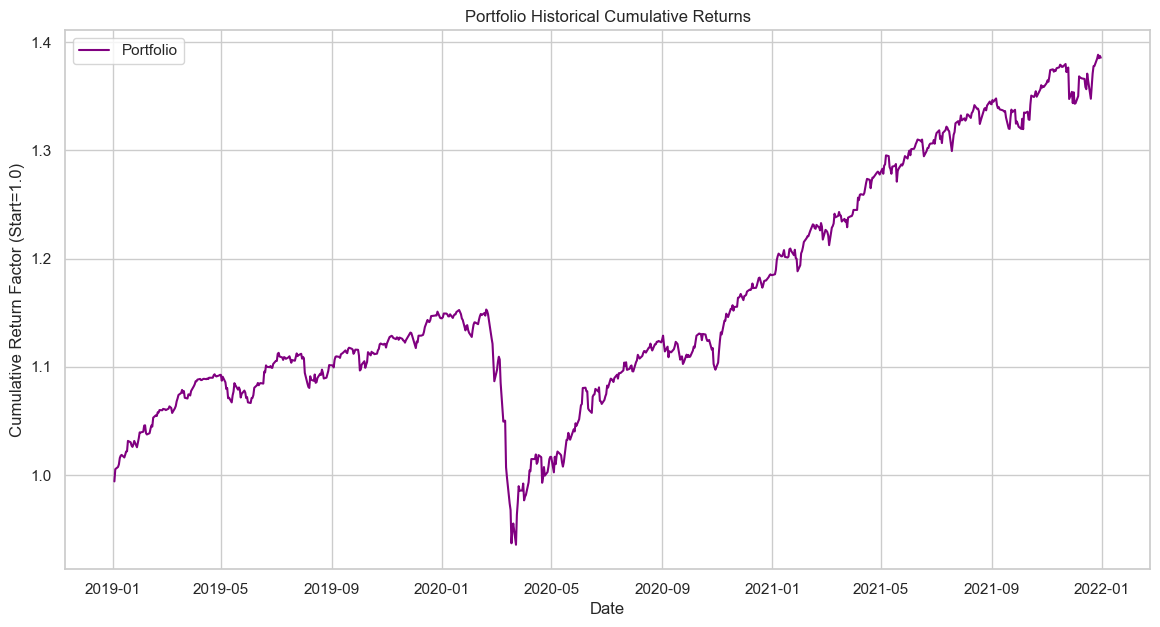

In [9]:
portfolio_cumulative_returns = (1 + portfolio_daily_returns).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(portfolio_cumulative_returns.index, portfolio_cumulative_returns, color='purple', label='Portfolio')
plt.title('Portfolio Historical Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return Factor (Start=1.0)')
plt.legend()
plt.show()

<h2 style="color: #FF6347;">Annualized Return.</h2>

In [10]:
total_days = len(portfolio_daily_returns)
annualization_factor = 261

ending_value = portfolio_cumulative_returns.iloc[-1]
beginning_value = portfolio_cumulative_returns.iloc[0] # Should be approx 1 + first_return

cagr = (portfolio_cumulative_returns.iloc[-1])**(annualization_factor / total_days) - 1

print(f"Annualized Return (CAGR): {cagr:.2%}")

Annualized Return (CAGR): 11.50%


<h2 style="color: #FF6347;">Annualized Volatility.</h2>

In [11]:
annualized_volatility = portfolio_daily_returns.std() * np.sqrt(annualization_factor)

print(f"Annualized Volatility: {annualized_volatility:.2%}")

Annualized Volatility: 8.51%


<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7208\3268182150.py:9: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  weights_by_family = aligned_weights.rename(columns=family_map).groupby(level=0, axis=1).sum()


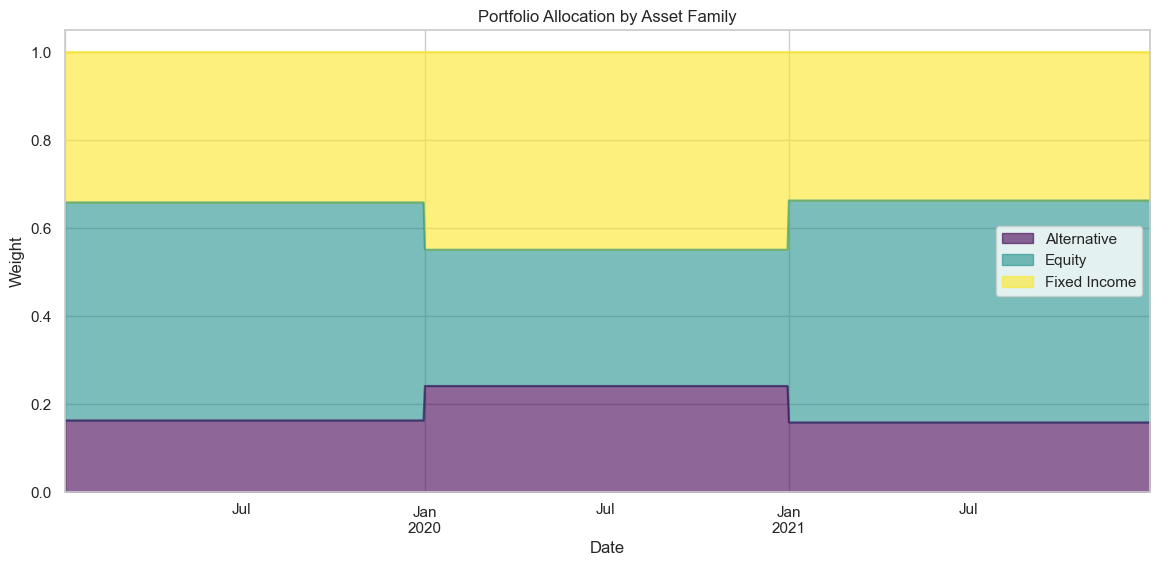

In [12]:
asset_info = pd.read_csv('asset_information_data.csv')

family_map = dict(zip(asset_info['Name'], asset_info['Family']))

weights_by_family = aligned_weights.rename(columns=family_map).groupby(level=0, axis=1).sum()

weights_by_family.plot.area(figsize=(14, 6), alpha=0.6, cmap='viridis')
plt.title('Portfolio Allocation by Asset Family')
plt.ylabel('Weight')
plt.xlabel('Date')
plt.margins(x=0)
plt.show()